In [0]:
#include the different libraries I think will be needed

import math
import numpy as np

In [0]:
#Question 1 - generate 100 and 1000 draws from a uniform distribution of random numbers 
#NOTE: Uniform distribution = probability of any event in the set occuring is identical 

draws_hund = np.random.rand(100) #initialize an array for the 100 draws
draws_thou = np.random.rand(1000) #initialize an array for the 100 draws


In [0]:
print(draws_thou.shape) #check size
print(draws_hund) #check structure

(1000,)
[0.89646361 0.77300626 0.0452829  0.85051274 0.42124536 0.42681696
 0.25696073 0.0623135  0.22760507 0.1775646  0.60240735 0.04172504
 0.64341157 0.88036959 0.20172683 0.11261536 0.49419773 0.8444164
 0.44586625 0.16285989 0.20736769 0.64947541 0.28345715 0.05196103
 0.41004314 0.4532592  0.02228669 0.56710839 0.0954235  0.12143938
 0.2575258  0.28276334 0.53476247 0.94110035 0.13834076 0.88440643
 0.35115165 0.97278828 0.76573526 0.72578911 0.65008888 0.80182824
 0.2462874  0.90116007 0.08744227 0.18906191 0.08024849 0.05295664
 0.91198668 0.35618351 0.75018872 0.29302634 0.86222516 0.07602786
 0.26471123 0.21148814 0.63606268 0.32108004 0.2291374  0.16789755
 0.61167012 0.99133077 0.87342359 0.04797046 0.57840055 0.33033858
 0.28530806 0.02976797 0.44483175 0.86503199 0.92295724 0.73816638
 0.74085971 0.33422527 0.28068191 0.26262138 0.79645261 0.65882679
 0.175848   0.89542425 0.26999872 0.19762226 0.72321973 0.2815489
 0.70865803 0.22631455 0.33422496 0.08201167 0.30734533 

In [0]:
import matplotlib
import matplotlib.pyplot as plt

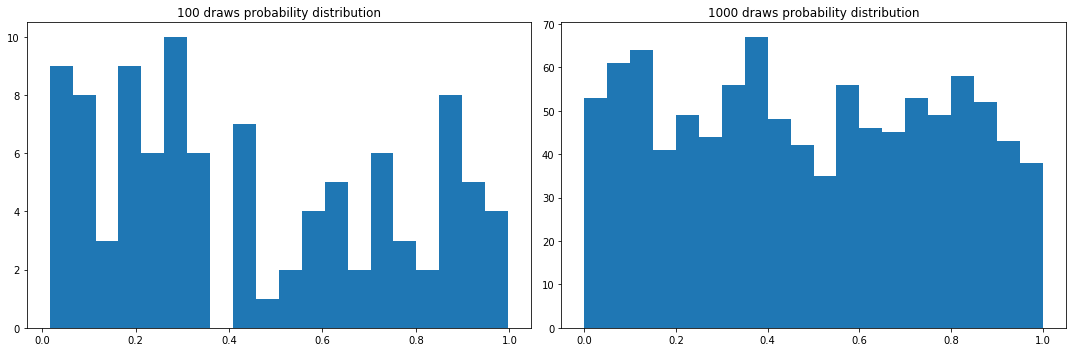

In [0]:
fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True, figsize=(15, 5))

n_bins = 20 #number of bins for the histogram; as the number of bins increases (i.e. more granular), the distribution becomes more uniform

# Generating the plots with matplotlib
axs[0].hist(draws_hund, bins=n_bins, density = False); #generate the first histogram of the subplot
axs[1].hist(draws_thou, bins=n_bins, density = False); #generate the second histogram of the subplot
axs[0].title.set_text('100 draws probability distribution')
axs[1].title.set_text('1000 draws probability distribution')

In [0]:
#Question 2 - creating a conditional loop to control the effect of generating a 1 or a 0 (binary)

def binary(p, #probability of generating a 0
           n): #number of draws
  body = []
  for i in range(n):
    if np.random.rand(1)>p:
      body.append(1) #add a one if the RNG makes a number greater than p
    else:
      body.append(0) #add a zero in the other case
  ones = sum(body) #number of ones generated
  zeros = n-ones #number of zeros generated
  print('The number of ones and zeros are %d and %d, respectively' %(ones, zeros))
  return ones, zeros
  

In [0]:
binary(0.9,10000) #test the function

The number of ones and zeros are 984 and 9016, respectively


(984, 9016)

In [0]:
#Question 3 - define a function to generate the result of a coin flip, with prob of getting heads (1) or tails (0)

def binarr(p, #probability of generating a 0 or tails
           inp): #array input
  s = inp > p #create a boolean array which indicates if values in the array inp are less than the probability of getting 0/tails
  s = s.astype("int") #convert the booleans into a 0/1 output --> if statement above is true, it's heads or 1, else: 0 or tails
  return s


In [0]:
# test out the function declared above
test_arr = np.array([0.4, 0.5, 0.6, 0.9]) #testing array
prob = 0.5 #probability of heads/tails are equal - fair coin

binarr(prob, test_arr)

array([0, 0, 1, 1])

In [0]:
#Question 4 - for each protein in a dividing cell, it randomly goes into a daughter cell stochastically similar to a coin flip (i.e. 50% likelihood)
#Simulate protein partitioning for numbers of protein in the mother cell (n = 10; 100; 1000..) to show that fractional variation scales 1/sqrt(n)

#mean = sum(ones*p)+sum(zeros*(1-p))
#variance = sum(0.5*(1-mean)^2) + sum(0.5*(0-mean)^2) 
#standard deviation = sqrt(variance)
#fractional variance = mean/standard deviation; should approximate 1/sqrt(n), and thus should approach zero as trials, n,  increase
protein_num = [10,100,1000,10000,100000]

#create lists for statistical variables
means = []
true_means = []
st_dev = []
variance = []
true_var = []
true_stdev = []
frac_var = [] 
true_fv = [] #true fractional variance is always 1/sqrt(n)

for i in range(len(protein_num)):
  ones, zeros = binary(0.5, protein_num[i])
  
  mean = 1*ones #mean calculation
  true_mean = protein_num[i]*0.5 #u = np; true expected mean formula
  means.append(mean) #add mean to the list
  true_means.append(true_mean) #add true mean to list for comparison
  
  var = ones*(0.5*((1-mean)**2))+zeros*(0.5*(mean**2)) #variance calculation
  variance.append(var) #adding the variance to the list
  stddev = math.sqrt(var) #standard deviation calculation
  st_dev.append(stddev) #adding standard deviation to list

  true_variance = protein_num[i]*0.5**2 #calculate expected population variance
  true_stndev = math.sqrt(true_variance) #calculate expected population standard deviation
  true_var.append(true_variance) #append to list
  true_stdev.append(true_stndev) #append to list

  frac_var.append(mean/stddev) #append to list
  true_fv.append(1/math.sqrt(protein_num[i]))
  

The number of ones and zeros are 6 and 4, respectively
The number of ones and zeros are 46 and 54, respectively
The number of ones and zeros are 485 and 515, respectively
The number of ones and zeros are 5025 and 4975, respectively
The number of ones and zeros are 49842 and 50158, respectively


In [0]:
#Look at the data from the random stats
print(means)
print(variance)
print(st_dev)
print(frac_var)

[6, 46, 485, 5025, 49842]
[147.0, 103707.0, 117377517.5, 126227876887.5, 124208763999957.0]
[12.12435565298214, 322.03571230532805, 10834.090524820254, 355285.62718958955, 11144898.563915106]
[0.4948716593053935, 0.1428413006455214, 0.044766101860501714, 0.014143549908700728, 0.004472180676581316]


In [0]:
#Look at the expected data
print(true_means)
print(true_var)
print(true_stdev)
print(true_fv)

[5.0, 50.0, 500.0, 5000.0, 50000.0]
[2.5, 25.0, 250.0, 2500.0, 25000.0]
[1.5811388300841898, 5.0, 15.811388300841896, 50.0, 158.11388300841898]
[0.31622776601683794, 0.1, 0.03162277660168379, 0.01, 0.003162277660168379]


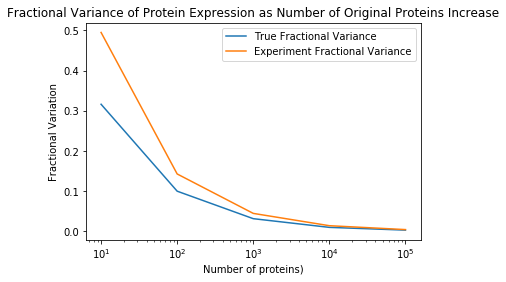

In [0]:
# Plot the fractional variance curves

plt.semilogx(protein_num, true_fv, label='True Fractional Variance')
plt.semilogx(protein_num, frac_var, label='Experiment Fractional Variance')
plt.title('Fractional Variance of Protein Expression as Number of Original Proteins Increase')
plt.xlabel('Number of proteins)')
plt.ylabel('Fractional Variation')
plt.legend()
